# Test simple thermal equations

## Mathematical model

We will investigate a room represented as a TiTe circuit depcited below

![alt text](TiTe.png "Title")

We can write the following equations for this system

$$Q=C_i\frac{dT_i}{dt}+\frac{T_i-T_e}{R_{ie}}$$
$$C_e\frac{dT_e}{dt}+\frac{T_e-T_i}{R_{ie}}+\frac{T_e-T_a}{R_{ee}}=$$

This can also be written as a system of equations as follows
$$\dot{\mathbf{x}}=A\mathbf{x}+b\mathbf{u}$$
with 
$$\mathbf{x}=\begin{bmatrix} T_i\\ T_e \end{bmatrix}$$
$$A=\begin{bmatrix} \tau_i & -\tau_i \\
                    -\tau_{ie} & \tau_{ie}+\tau_{ea}
    \end{bmatrix}
$$
$$b= \begin{bmatrix}-C_i \\-\tau_{ae}\end{bmatrix}$$
$$\mathbf{u}=\begin{bmatrix}Q\\T_a\end{bmatrix}$$
$\tau_i=1/(R_{ie}C_i)$, $\tau_{ie}=1/(R_{ie}C_e)$, $\tau_{ea}=1/(R_{ea}C_e)$

## System set up

$\tau_i = 0.2$, $\tau_{ie} = 2$ $\tau_{ea}=1.5$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tau_i = 0.2
tau_ie = 2
tau_ea = 1.5
C_i = 10

In [3]:
A = np.array([[-tau_i, tau_i],[tau_ie, -tau_ie-tau_ea]])
b = np.array([1/C_i,tau_ea])

In [4]:
dt = 0.1
n = 600
Ta = 15
Ti = 20

u1 = np.zeros((n, 1))
u1[300:] = 10
u2 = np.ones((n, 1))*Ta
u = np.concatenate((u1, u2), axis=1)
x = np.zeros((n,2))


In [5]:
x0 = np.array([Ti, (Ti+Ta)/2])
x[0,:]=x0

In [6]:
def J(x_i, u_i):
    return A@x_i+b*u_i

In [7]:
for i in np.arange(1,n):
    x[i, :] = x[i-1, :]+J(x[i-1, :], u[i-1, :])*dt

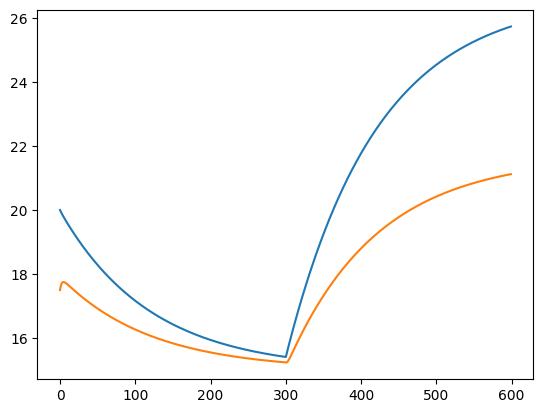

In [8]:
plt.plot(x)

In [9]:
x[-1,:]

array([25.73429397, 21.1209503 ])

In [32]:
from pyomo.environ import *

In [ ]:
model.x